In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd

from icecream import ic
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

from Data.Data_Loader import Data_Loader
from Model.simple_model import Pretrain_AutoEncoder
from Model.simple_model import DeepSVDD
from deep_svdd_train import DeepSVDDTrain
from pretrain import PreTrain

In [3]:
#json 파일로 바꿔보기
args = {'data_type':'mnist',
        'normal_class':1,
        'epochs':10,
       'batch': 32,
       'pretrain':True,
       'tensorflow_data_type':False,
       'weight_decay': 1e-6}

In [4]:
data_loader = Data_Loader(args)

pretrain_train_dataset, pretrain_test_dataset = data_loader.pretrain_mnist()
svdd_train_dataset, svdd_test_dataset = data_loader.svdd_mnist()

In [26]:
model = DeepSVDD(500, 350, 2, 784)

In [35]:
input_arr = tf.random.uniform((1, 784))
model(input_arr)
model.save('my_model', save_format='tf')

INFO:tensorflow:Assets written to: my_model\assets


In [33]:
model.save_weights('asd.h5')

In [34]:
model.load_weights('asd.h5')

In [6]:
svdda.latent_dim

2

In [19]:
class CustomModel(keras.Model):
    def __init__(self, hidden_units):
        super(CustomModel, self).__init__()
        self.dense_layers = [keras.layers.Dense(u) for u in hidden_units]

    def call(self, inputs):
        x = inputs
        for layer in self.dense_layers:
            x = layer(x)
        return x


model = CustomModel([16, 16, 10])
# Build the model by calling it
input_arr = tf.random.uniform((1, 5))
outputs = model(input_arr)
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


In [10]:
ae = Pretrain_AutoEncoder(500, 350, 2, 784)
svdd = DeepSVDD(500, 350, 2, 784)

trainer = PreTrain(config, ae_model=ae, train_dataset=pretrain_train_dataset, test_dataset = pretrain_test_dataset)
trainer.start_check()

In [39]:
svdd.input_dim

784

In [8]:
hist = trainer.pretrain_ae()

Epoch 1/10
211/211 [==============================] - 2s 7ms/step - loss: 0.0325 - mae: 0.0550
Epoch 2/10
211/211 [==============================] - 1s 7ms/step - loss: 0.0178 - mae: 0.0364
Epoch 3/10
211/211 [==============================] - 1s 7ms/step - loss: 0.0164 - mae: 0.0349
Epoch 4/10
211/211 [==============================] - 1s 7ms/step - loss: 0.0145 - mae: 0.0317
Epoch 5/10
211/211 [==============================] - 2s 7ms/step - loss: 0.0140 - mae: 0.0305
Epoch 6/10
211/211 [==============================] - 2s 7ms/step - loss: 0.0131 - mae: 0.0293
Epoch 7/10
211/211 [==============================] - 2s 7ms/step - loss: 0.0130 - mae: 0.0291
Epoch 8/10
211/211 [==============================] - 2s 7ms/step - loss: 0.0130 - mae: 0.0290
Epoch 9/10
211/211 [==============================] - 1s 7ms/step - loss: 0.0128 - mae: 0.0287
Epoch 10/10
211/211 [==============================] - 1s 7ms/step - loss: 0.0127 - mae: 0.0288
Saved to C:\Users\HYKP\PycharmProjects\bistel\Dee

In [9]:
#args = args
#DeepSVDDTrain(args=args, svdd_model=svdd, train_dataset = svdd_train_dataset, test_dataset = svdd_test_dataset) args = args(X) 여백 X
#argument들은 꼭 공백없이 붙여서
deep_trainer = DeepSVDDTrain(args=args, svdd_model=svdd, train_dataset=svdd_train_dataset, test_dataset=svdd_test_dataset)

In [10]:
svdd, R = deep_trainer.train_deep_svdd()

Start of epoch 1
step 50: mean loss = 7.4031
step 100: mean loss = 4.3118
step 150: mean loss = 3.1084
step 200: mean loss = 2.4366
Start of epoch 2
step 50: mean loss = 1.9485
step 100: mean loss = 1.6953
step 150: mean loss = 1.4974
step 200: mean loss = 1.3438
Start of epoch 3
step 50: mean loss = 1.1971
step 100: mean loss = 1.0967
step 150: mean loss = 1.0148
step 200: mean loss = 0.9477
Start of epoch 4
step 50: mean loss = 0.8766
step 100: mean loss = 0.8251
step 150: mean loss = 0.7834
step 200: mean loss = 0.7444
Start of epoch 5
step 50: mean loss = 0.7011
step 100: mean loss = 0.6687
step 150: mean loss = 0.6391
step 200: mean loss = 0.6123
Start of epoch 6
step 50: mean loss = 0.5833
step 100: mean loss = 0.5618
step 150: mean loss = 0.5426
step 200: mean loss = 0.5239
Start of epoch 7
step 50: mean loss = 0.5027
step 100: mean loss = 0.4873
step 150: mean loss = 0.4728
step 200: mean loss = 0.4601
Start of epoch 8
step 50: mean loss = 0.4452
step 100: mean loss = 0.4333
st

In [25]:
center = deep_trainer.set_c()

In [11]:
plt.plot()

0.11490287184715274

In [17]:
a = svdd.predict(pretrain_train_dataset)
b = svdd.predict(pretrain_test_dataset)
c = svdd.predict(svdd_test_dataset)

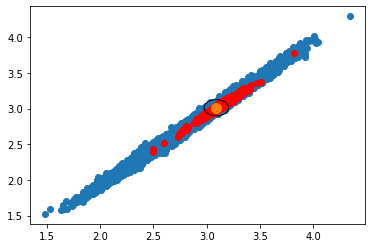

In [29]:
fig, ax = plt.subplots()
ax.scatter(c[:,0], c[:,1])
ax.scatter(a[:,0], a[:,1], color ='r')
ax.scatter(center[0], center[1], s = 100)

circle = plt.Circle((center[0], center[1]), R, fill=False)
ax.add_artist(circle)
plt.show()